<a href="https://colab.research.google.com/github/Jyts2094/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
# load the dataset

dataset_path = '/content/drive/MyDrive/vaccination_all_tweets.csv'
dataset = pd.read_csv(dataset_path)

# print the dataset shape
dataset.shape

(228207, 16)

In [12]:

# Define sample size
sample_size = 100000

# Sample the dataset to reduce its size
dataset = dataset.sample(n=sample_size, random_state=0)

#  check some top records of the sampled dataset
dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
112307,1408473814959153154,Hindustan Times,India,One of India's largest media companies. Latest...,2009-04-29 10:11:34,8087995,139,2928,True,2021-06-25 17:15:00,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",Twitter Media Studio,13,28,False
34439,1373296843489165320,Adam John Ritchie,"Oxford, UK",@UniofOxford COVID and rabies vaccine developm...,2011-10-03 11:11:48,2599,742,377,False,2021-03-20 15:34:16,@fascinatorfun I'd say exported vials is a ver...,NaN,Twitter Web App,1,12,False
41727,1377040882944376834,Dr. Sumana Chattopadhyay 🌊 #BLM,"Wisconsin, USA","An academic with a zest for politics, current ...",2011-02-28 06:04:28,484,1749,16167,False,2021-03-30 23:31:45,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Twitter Web App,0,2,False
37934,1375163920374235147,Former President-Elect: The Leviathan 🐍🗽,Portugal,"#Hacker, #Engineer, #Scientist and #Fisher.\n#...",2011-10-19 10:56:56,1301,3942,118527,False,2021-03-25 19:13:22,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Twitter Web App,0,0,False
56853,1382733098794770433,The Age,"Melbourne, Australia",Breaking news. Must-read columnists. Award-win...,2009-04-16 23:28:23,906099,1193,482,True,2021-04-15 16:30:35,Getting the Dolly Parton Moderna jab marked th...,NaN,Echobox,2,2,False


In [13]:

# create new dataframe with columns needed for analysis
extracted_texts= pd.DataFrame()
extracted_texts['text']= dataset['text']
extracted_texts['hashtag']=dataset['hashtags']
extracted_texts.shape

(100000, 2)

In [14]:
# find null values
extracted_texts.isnull().sum()


# remove data items having value null
extracted_texts = extracted_texts.dropna(subset=['text', 'hashtag'])
extracted_texts.shape


(78014, 2)

In [11]:
# remove data items with null values
extracted_data = extracted_data.dropna(subset=['text', 'hashtag'])
extracted_data.shape

(78014, 2)

In [15]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

def exclude_emoji(string):
    emj_regex = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               "]+", flags=re.UNICODE)
    return emj_regex.sub(r'', string)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
# clean strings method
def string_cleaning(text):
    # Remove emojis
    text = exclude_emoji(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# clean the strings by applying the method defined
extracted_texts['cleaned_text'] = extracted_texts['text'].apply(string_cleaning)


extracted_texts.head(5)

,text,hashtag,cleaned_text
112307,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",DeltaPlus variant Coronavirus raised concerns ...
41727,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Second Moderna shot arm Vaccinated Moderna COV...
37934,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Good work PLA Airforce least theyre getting re...
124000,"[16:49:26] 122002, 01-07-2021, 22 dose2 at Meg...","['COVAXIN', 'GurgaonCOVAXIN']",164926 122002 01072021 22 dose2 Meghraj Apollo...
134913,"[08:49:44] 122018, 22-07-2021, 71 dose1 at Par...","['COVAXIN', 'GurgaonCOVAXIN']",084944 122018 22072021 71 dose1 Park Hospital ...


In [17]:
# Sentiment analysis

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# Initialize the VADER sentiment analyzer
sentiment_analyzer = SIA()

# Apply sentiment analysis to the 'cleaned_text' column
# The lambda function processes each text entry by:
# 1. Converting text to lowercase
# 2. Removing non-word characters
# 3. Calculating sentiment scores using VADER
extracted_texts['sentiments'] = extracted_texts['cleaned_text'].apply(lambda x: sentiment_analyzer.polarity_scores(' '.join(re.findall(r'\w+', str(x).lower()))))

# Extract the +ve sentiment score and avoid zeroes by adding a small value
extracted_texts['Positive Sentiment'] = extracted_texts['sentiments'].apply(lambda x: x['pos'] + 1 * (10**-4))

# Extract the neutral sentiment score and avoid zeroes by adding a small value
extracted_texts['Neutral Sentiment'] = extracted_texts['sentiments'].apply(lambda x: x['neu'] + 1 * (10**-4))

# Extract the -ve sentiment score and add  avoid zeroes by adding a small value
extracted_texts['Negative Sentiment'] = extracted_texts['sentiments'].apply(lambda x: x['neg'] + 1 * (10**-4))

# Combine the sentiment scores into a single sentiment value
# sentiment score = +ve sentiment - -ve sentiment
extracted_texts['Sentiment Score'] = extracted_texts.apply(lambda row: row['Positive Sentiment'] - row['Negative Sentiment'], axis=1)

# Display the top records resulting data
extracted_texts.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,hashtag,cleaned_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Sentiment Score
112307,The #DeltaPlus variant of #Coronavirus has rai...,"['DeltaPlus', 'Coronavirus']",DeltaPlus variant Coronavirus raised concerns ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0001,1.0001,0.0001,0.000
41727,Second Moderna shot in the arm🙂! #Vaccinated #...,"['Vaccinated', 'Moderna', 'COVID19Vaccine', 'M...",Second Moderna shot arm Vaccinated Moderna COV...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0001,1.0001,0.0001,0.000
37934,Good work PLA Airforce!\nAt least they're gett...,['SinoVac'],Good work PLA Airforce least theyre getting re...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.2091,0.7911,0.0001,0.209
124000,"[16:49:26] 122002, 01-07-2021, 22 dose2 at Meg...","['COVAXIN', 'GurgaonCOVAXIN']",164926 122002 01072021 22 dose2 Meghraj Apollo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0001,1.0001,0.0001,0.000
134913,"[08:49:44] 122018, 22-07-2021, 71 dose1 at Par...","['COVAXIN', 'GurgaonCOVAXIN']",084944 122018 22072021 71 dose1 Park Hospital ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0001,1.0001,0.0001,0.000


In [18]:
from keras import layers
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
word_maximum = 5000
length_maximum = 200

instance_of_tk = Tokenizer(num_words=word_maximum)
instance_of_tk.fit_on_texts(extracted_texts['cleaned_text'])
sqns = instance_of_tk.texts_to_sequences(extracted_texts['cleaned_text'])
twts = pad_sequences(sqns, maxlen=length_maximum)
print(twts)

[[   0    0    0 ...   43  493  239]
 [   0    0    0 ...    2   82  519]
 [   0    0    0 ...  973   15   17]
 ...
 [   0    0    0 ... 3275    3 1078]
 [   0    0    0 ... 3173  234  546]
 [   0    0    0 ...   32    1   12]]


In [19]:

import numpy as np
import tensorflow as tf
sentmnt_scores = np.array(extracted_texts['Sentiment Score'])
target = []
for p in range(len(sentmnt_scores)):
    if sentmnt_scores[p] == 0:
        target.append(0)
    if sentmnt_scores[p] <0:
        target.append(1)
    if sentmnt_scores[p] >0:
        target.append(2)
target = np.array(target)
sentmnt_scores = tf.keras.utils.to_categorical(target, 3)
del target
print(sentmnt_scores)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [21]:
extracted_data1 = pd.DataFrame(extracted_texts['hashtag'])
import ast

# Convert the 'hashtag' strings to actual lists
extracted_data1['hashtag'] = extracted_data1['hashtag'].apply(ast.literal_eval)

# Flatten the list of lists into a single list of hashtags
flattened_hashtags = [hashtag for sublist in extracted_data1['hashtag'] for hashtag in sublist]

# Get unique hashtag values
unique_hashtags = list(set(flattened_hashtags))

# Print the unique hashtags
print("Unique Hashtags:")
for hashtag in unique_hashtags:
    print(hashtag)

Streaming output truncated to the last 5000 lines.
Stainless
CuidateDeLaCovid19
9999feelsun
fᴜʟʟʏvᴀᴄᴄɪɴᴀᴛᴇᴅ
SuperBowlLV
Bangkok
clarksville
kudos
healthminister
Gilead
ShriRamNavami
الجزائر
Ramadan
Xi
Dickinson
VacationVibes
GPs
ZolaMovie
WeAreWithPalestine
Messi30
bethegood
الكويت
unique
native
sarawak
yesterday
indiavaccation
KarurDistrict
bachchsmart
Idesofmarch
Sukhoi
TheMoreYouKnow
TalbiyaUmrahPvtLtd
ImranKhan
vaccinology
jab2
ICC
vadodara
WallSt
Impfverweigerer
KolkataAirport
cloudninehospital
LasVegas
Bovine
COVAXINAPPROVALINVCANADA
DrFauci
capio
GlobalChemistryExperiment
quran
Canada
isupportindianvaccine
CDCinfo
ICantWaitToHugYou
DarkSide
Sheffield
TeamRuchika
JusticeForChaithra
GPO
testcricket
Spokespersons
BeautifulBakersfieldAwards
CovidIndia
DailVoice
ARR
VaccinationCenter
Dek64
HBLPSL6
tingyc
covisild
HarshVardhanShringla
Morrison
onthatnote
Reported
MyMBMCvaccinationUpdate
nitishkumar
VACCINATEANDSTAYSAFE
AdverseEvents
SadhguruQuotes
postcard
PsyWars
PancakeSwap
Vivelafr

In [24]:
# create possible tags for each vaccines
pfizer_tags = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_tags = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_tags = ["russia","sputnik","Sputnik","V"]
astra_tags = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_tags = ['moderna','Moderna','mRNA-1273','Spikevax']

In [25]:
def get_tag_occurence(text, tags):
  flag =0
  for ref in tags:
    if text.find(ref) != -1:
      flag =1
  return flag

extracted_texts['pfizer'] = extracted_texts['cleaned_text'].apply(lambda x : get_tag_occurence(x, pfizer_tags))
extracted_texts['bbiotech'] = extracted_texts['cleaned_text'].apply(lambda x : get_tag_occurence(x, bbiotech_tags))
extracted_texts['sputnik'] = extracted_texts['cleaned_text'].apply(lambda x : get_tag_occurence(x, sputnik_tags))
extracted_texts['astra'] = extracted_texts['cleaned_text'].apply(lambda x : get_tag_occurence(x, astra_tags))
extracted_texts['moderna'] = extracted_texts['cleaned_text'].apply(lambda x : get_tag_occurence(x, moderna_tags))

display(extracted_texts.pfizer.value_counts(),extracted_texts.bbiotech.value_counts(),extracted_texts.sputnik.value_counts(),extracted_texts.astra.value_counts(),extracted_texts.moderna.value_counts())



,count
pfizer,
0,69173
1,8841


,count
bbiotech,
0,64007
1,14007


,count
sputnik,
1,43873
0,34141


,count
astra,
0,75348
1,2666


,count
moderna,
0,58587
1,19427


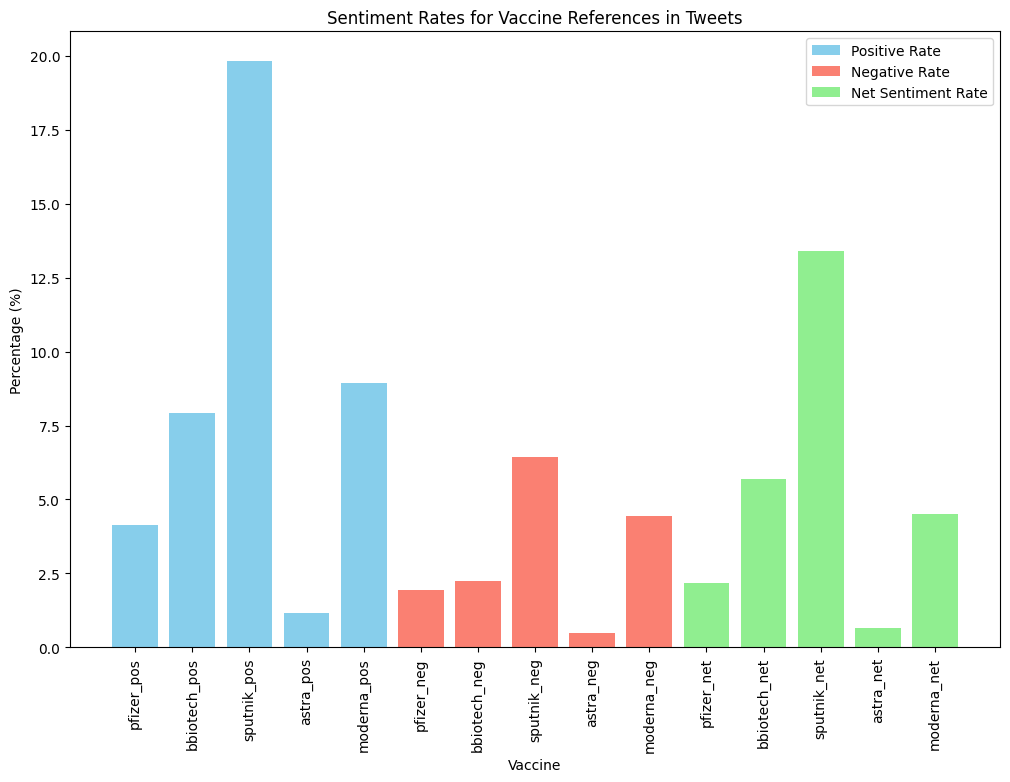

In [29]:
import matplotlib.pyplot as plt # Import Matplotlib

# Filter the data to include positive and negative sentiment
positive_data = extracted_texts[extracted_texts['Sentiment Score'] > 0]
negative_data = extracted_texts[extracted_texts['Sentiment Score'] < 0]

# Define the vaccine names
vaccines = ['pfizer', 'bbiotech', 'sputnik', 'astra', 'moderna']

# Count the total references for each vaccine
total_references = {
    vaccine: extracted_texts[vaccine].notna().sum() for vaccine in vaccines
}

# Count the number of positive and negative references for each vaccine
positive_references = {
    vaccine: positive_data[vaccine].value_counts().get(1, 0) for vaccine in vaccines
}
negative_references = {
    vaccine: negative_data[vaccine].value_counts().get(1, 0) for vaccine in vaccines
}

# Calculate the positive rate, negative rate, and net sentiment rate
positive_rate = {
    vaccine: (positive_references[vaccine] / total_references[vaccine] * 100) if total_references[vaccine] > 0 else 0
    for vaccine in vaccines
}
negative_rate = {
    vaccine: (negative_references[vaccine] / total_references[vaccine] * 100) if total_references[vaccine] > 0 else 0
    for vaccine in vaccines
}
net_sentiment_rate = {
    vaccine: ((positive_references[vaccine] - negative_references[vaccine]) / total_references[vaccine] * 100)
    if total_references[vaccine] > 0 else 0
    for vaccine in vaccines
}

# Plotting the rates
plt.figure(figsize=(12, 8)) # Create a figure using plt

# Plot Positive Rate
plt.bar([v + "_pos" for v in vaccines], positive_rate.values(), color='skyblue', label='Positive Rate')

# Plot Negative Rate
plt.bar([v + "_neg" for v in vaccines], negative_rate.values(), color='salmon', label='Negative Rate')

# Plot Net Sentiment Rate
plt.bar([v + "_net" for v in vaccines], net_sentiment_rate.values(), color='lightgreen', label='Net Sentiment Rate')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Vaccine')
plt.ylabel('Percentage (%)')
plt.title('Sentiment Rates for Vaccine References in Tweets')
plt.legend()

# Show the plot
plt.show() # Display the plot using plt

In [31]:
from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(twts, sentmnt_scores, test_size=0.25, random_state=0)
print("Number of pred_pad_sqnc samples:", len(input_test))


Number of pred_pad_sqnc samples: 19504


In [32]:
from keras import regularizers
from keras.models import Sequential
model = Sequential()
model.add(layers.Embedding(word_maximum, 40, input_length=length_maximum))
model.add(layers.Conv1D(20, 6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3), bias_regularizer=regularizers.l2(2e-3)))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(20, 6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3), bias_regularizer=regularizers.l2(2e-3)))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:

checkpoint_callback = ModelCheckpoint(filepath='model.weights.h5', monitor='val_loss', save_weights_only=True)


import time
start_time = time.time()
record = model.fit(input_train, target_train, epochs=15, validation_data=(input_test, target_test), verbose=1, callbacks=[checkpoint_callback])
stop_time = time.time()

t_acc = record.history['acc']
t_loss = record.history['loss']
val_acc = record.history['val_acc']
val_loss = record.history['val_loss']
t_time = stop_time - start_time

print(t_time)


Epoch 1/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - acc: 0.4917 - loss: 1.1397 - val_acc: 0.5491 - val_loss: 0.9663
Epoch 2/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - acc: 0.6092 - loss: 0.9142 - val_acc: 0.6826 - val_loss: 0.8096
Epoch 3/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - acc: 0.7012 - loss: 0.7743 - val_acc: 0.7020 - val_loss: 0.7602
Epoch 4/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - acc: 0.7273 - loss: 0.7198 - val_acc: 0.7120 - val_loss: 0.7390
Epoch 5/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - acc: 0.7404 - loss: 0.6834 - val_acc: 0.7189 - val_loss: 0.7165
Epoch 6/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - acc: 0.7487 - loss: 0.6620 - val_acc: 0.6909 - val_loss: 0.7617
Epoch 7/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - acc: 0.7532 - loss: 0.6454 - val_acc: 0.7232 - val_loss: 0.7044
Epoch 8/15
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - acc: 0.7550 - loss: 0.6356 - val_acc: 0.7194 - val_loss: 0.7053
Epoch 9/15
1829/1829 ━━━

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc

sentiment = ['Neutral', 'Negative', 'Positive']
cnn_predictions = model.predict(input_test)
_y_test = [np.argmax(row) for row in target_test]
_cnn_predictions = [np.argmax(row) for row in cnn_predictions]
cnn_accuracy = accuracy_score(_y_test, _cnn_predictions)
print("CNN Model Accuracy:", cnn_accuracy)
print("Classification Report:\n", classification_report(_y_test, _cnn_predictions, target_names=sentiment))

610/610 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
CNN Model Accuracy: 0.6900123051681706
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.80      0.78      0.79      9426
    Negative       0.32      0.59      0.41      2846
    Positive       0.88      0.61      0.72      7232

    accuracy                           0.69     19504
   macro avg       0.67      0.66      0.64     19504
weighted avg       0.76      0.69      0.71     19504



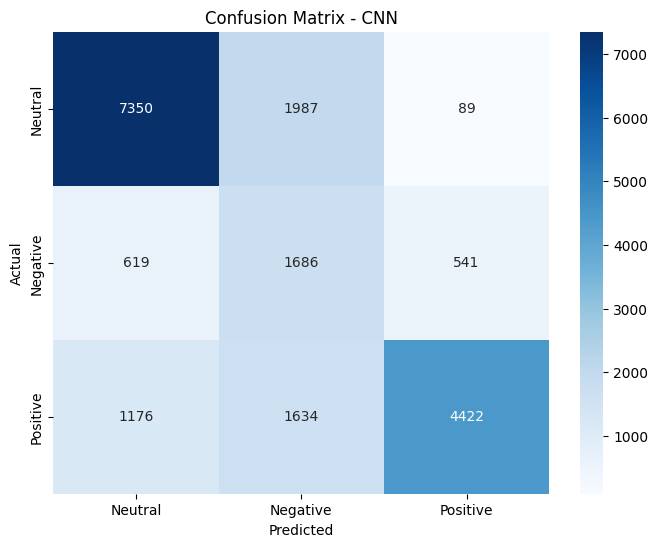

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import Matplotlib
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the model
cnn_cm = confusion_matrix(_y_test,  _cnn_predictions)

# Create a figure and axes object
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Neutral', 'Negative', 'Positive'],
            yticklabels=['Neutral', 'Negative', 'Positive'])

# Label the x-axis as 'Predicted'
plt.xlabel('Predicted')  # Use plt instead of instance_plot

# Label the y-axis as 'Actual'
plt.ylabel('Actual')   # Use plt instead of instance_plot

# give title of plot
plt.title('Confusion Matrix - CNN') # Use plt instead of instance_plot

# Display the plot
plt.show()  # Use plt instead of instance_plot

In [37]:
sentiment = ['Neutral','Negative','Positive']

sqnc_for_prediction = instance_of_tk.texts_to_sequences(['The planned shipment of #PfizerBiontech #vaccine to Bulgaria was postponed due to bad weather in #Germany, authorit… https://t.co/tCwTk56wfM'])
pred_pad_sqnc = pad_sequences(sqnc_for_prediction, maxlen=length_maximum)
sentiment[np.around(model.predict(pred_pad_sqnc), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


'Negative'

In [38]:

sqnc_for_prediction = instance_of_tk.texts_to_sequences(['Oh this been the best explanation for the vaccine and our immune response #PfizerBioNTech #Moderna https://t.co/4lwGIWBjKM'])
pred_pad_sqnc = pad_sequences(sqnc_for_prediction, maxlen=length_maximum)
sentiment[np.around(model.predict(pred_pad_sqnc), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'Positive'

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
vectorizer = TfidfVectorizer(max_features=word_maximum)
X_tfidf = vectorizer.fit_transform(extracted_texts['cleaned_text']).toarray()

# Train-pred_pad_sqnc split for Decision Tree
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_tfidf, np.argmax(sentmnt_scores, axis=1), test_size=0.25, random_state=0)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train_dt, y_train_dt)

# predict latest for test set using the trained Decision Tree model
dt_test_predictions = dt_model.predict(X_test_dt)

# find accuracy
dt_acc = accuracy_score(y_test_dt, dt_test_predictions)

# Print the accuracy score of the Decision Tree model
print("Decision Tree Model Accuracy:", dt_acc)

# Print the classification
print("Classification Report:\n", classification_report(y_test_dt, dt_test_predictions, target_names=sentiment))

Decision Tree Model Accuracy: 0.8873051681706317
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.91      0.94      0.92      9426
    Negative       0.76      0.71      0.73      2846
    Positive       0.90      0.89      0.90      7232

    accuracy                           0.89     19504
   macro avg       0.86      0.85      0.85     19504
weighted avg       0.89      0.89      0.89     19504



(19504,)


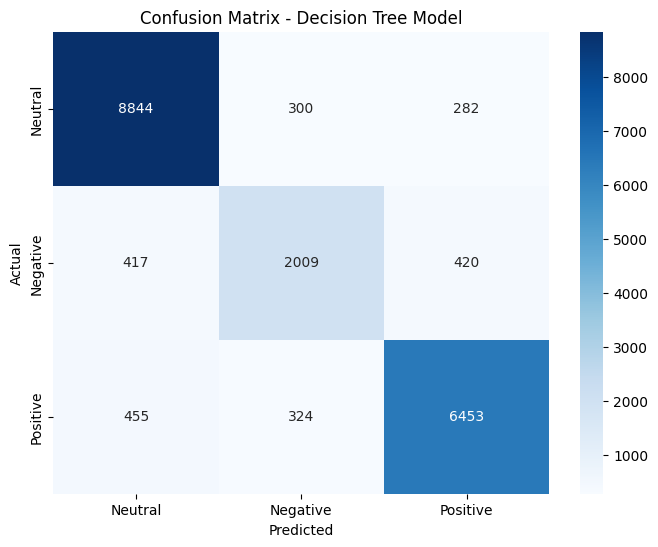

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import Matplotlib
from sklearn.metrics import confusion_matrix

print(y_test_dt.shape)

# Compute the confusion matrix for the Decision Tree model
dt_cm = confusion_matrix(y_test_dt, dt_test_predictions)


# Set up the plot with a specific figure size
plt.figure(figsize=(8, 6)) # Use plt instead of instance_plot

# Create a heatmap to visualize the confusion matrix
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Neutral', 'Negative', 'Positive'],
            yticklabels=['Neutral', 'Negative', 'Positive'])

# Label the x-axis as 'Predicted'
plt.xlabel('Predicted') # Use plt instead of instance_plot

# Label the target-axis as 'Actual'
plt.ylabel('Actual') # Use plt instead of instance_plot

# Set the title of the plot
plt.title('Confusion Matrix - Decision Tree Model') # Use plt instead of instance_plot

# Display the plot
plt.show() # Use plt instead of instance_plot

In [42]:
def predict_sentiment_dt(text):
    """
    Predict the sentiment of a given text using a trained Decision Tree model.

    Parameters:
    text (str): The text input for sentiment prediction.

    Returns:
    str: The predicted sentiment.
    """
    # Clean the text by removing emojis
    text = exclude_emoji(text)

    # Further clean the text (e.g., removing special characters, lowercasing)
    text = string_cleaning(text)

    # Transform the cleaned text using the pre-fitted vectorizer
    sqnc_for_prediction = vectorizer.transform([text]).toarray()

    # Predict the sentiment using the Decision Tree model
    prediction_index = dt_model.predict(sqnc_for_prediction)[0]

    # Map the prediction index to the corresponding sentiment
    return sentiment[prediction_index]

In [43]:
print(predict_sentiment_dt('The planned shipment of #PfizerBiontech #vaccine to Bulgaria was postponed due to bad weather in #Germany, authorit… https://t.co/tCwTk56wfM'))

Negative


In [44]:
print(predict_sentiment_dt('Oh this been the best explanation for the vaccine and our immune response #PfizerBioNTech #Moderna https://t.co/4lwGIWBjKM'))

Positive
